# Exploratory Data Analysis on Titanic Dataset

### ~ Import Libraries & Load the Dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv(r"D:\data\internship\3\Task 2\Titanic.csv")

# Display first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 ### ~ Understand the Dataset

In [3]:
# Shape of the dataset
df.shape

# Column data types and non-null counts
df.info()

# Summary statistics for numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Handling Missing Values

In [4]:
# Check missing values
df.isnull().sum()

# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# If 'Cabin' exists, drop it due to too many missing values
if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)


### Converting Data Types if Necessary

In [5]:
# Convert 'Survived' to categorical
df['Survived'] = df['Survived'].astype('category')

# Optional: Convert Pclass to categorical
df['Pclass'] = df['Pclass'].astype('category')

### Summary Statistics by Group

In [6]:
# Make sure 'Survived' is numeric
df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')

# Survival by gender
print(df.groupby('Sex')['Survived'].mean())

# Survival by Pclass
print(df.groupby('Pclass')['Survived'].mean())

# Combined survival by Pclass and Sex
print(df.pivot_table(index='Pclass', columns='Sex', values='Survived'))


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


C:\Users\AdminPC\AppData\Local\Temp\ipykernel_1524\2710415573.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Pclass')['Survived'].mean())
C:\Users\AdminPC\AppData\Local\Temp\ipykernel_1524\2710415573.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  print(df.pivot_table(index='Pclass', columns='Sex', values='Survived'))


## Data Visualizations

### Bar Plot: Survival by Gender

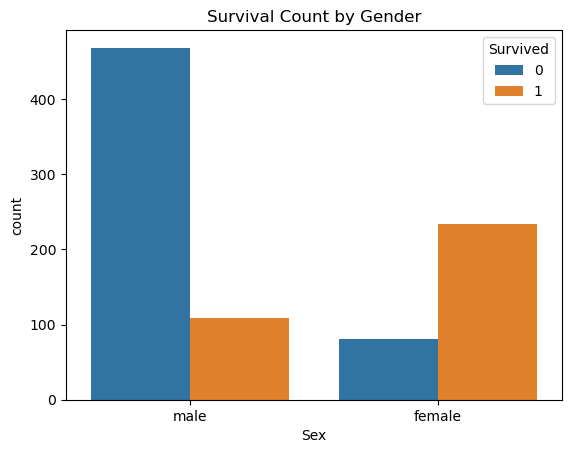

In [7]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Gender")
plt.show()

### Bar Plot: Survival by Passenger Class

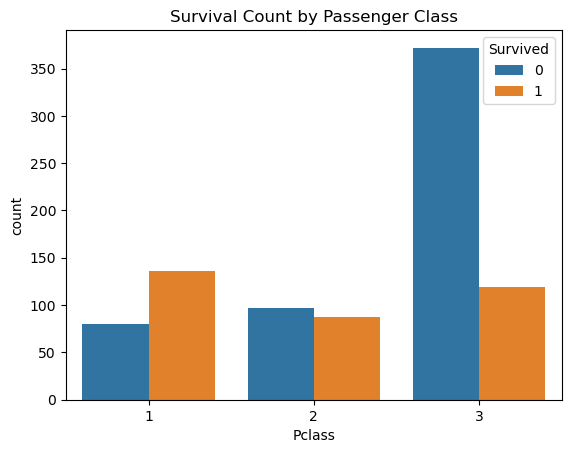

In [8]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival Count by Passenger Class")
plt.show()


### Age Distribution by Survival

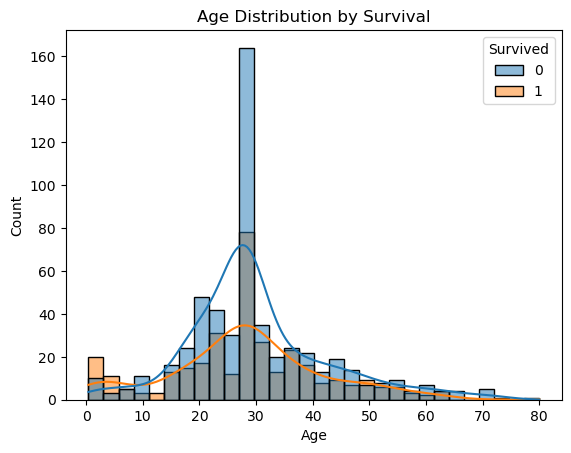

In [9]:
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
plt.title("Age Distribution by Survival")
plt.show()


### Heatmap of Correlation

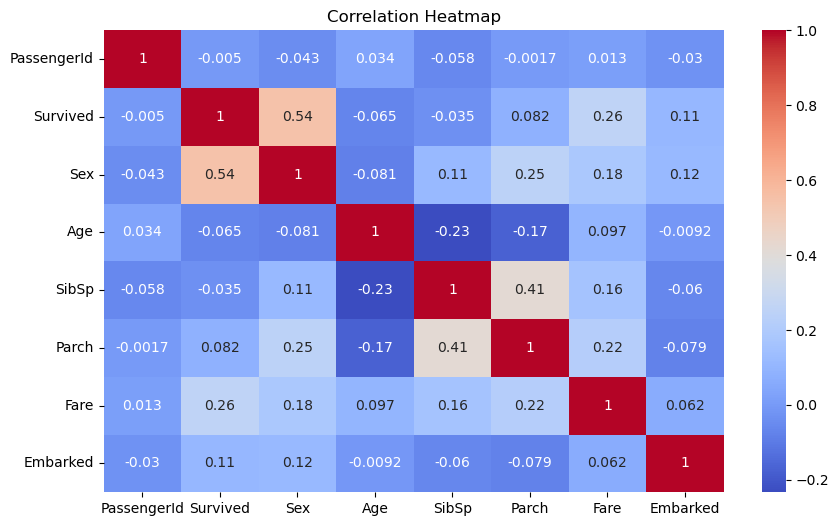

In [11]:
# Encode categorical variables if needed
df_encoded = df.copy()
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Compute correlation matrix
corr = df_encoded.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Key Insights from Correlation Heatmap
### 1. Sex is Strongly Correlated with Survival
- Correlation: 0.54

This is the strongest positive correlation with survival.

Since in your encoding:

male = 0, female = 1

Women were much more likely to survive.

Interpretation: "Women and children first" policy likely played a key role in survival outcomes.

### 2. Fare vs Survival
- Correlation: 0.26

Higher ticket prices correlate positively with survival.

Interpretation: Passengers who paid more (i.e., were in higher classes) had better survival chances — likely due to better cabin access and priority evacuation.

### 3. Parch and SibSp Correlations
- Parch (Parents/Children): 0.082

- SibSp (Siblings/Spouses): -0.035

These have weak correlations, but:

Slight positive correlation means having family on board may slightly increase survival.

But too many family members (e.g., large families) might hurt chances.

### 4. Embarked vs Survival
- Correlation: 0.11 (very weak)

Passengers who boarded from certain ports may have had a slightly higher chance of survival, but it's not a strong factor.

### 5. Age vs Survival
- Correlation: -0.065

Slight negative correlation — younger passengers slightly more likely to survive.
